# **Diabetes Classification with Logistic Regression**

## Import necessary libraries

In [1]:
import sklearn as sk
sk.__version__

'1.2.2'

In [17]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import the class for Logistic Regression
from sklearn.linear_model import LogisticRegression

# For data splitting
from sklearn.model_selection import train_test_split

# import the metrics class
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# import required modules
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [6]:
# Split dataset in features and target variable

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split().

You need to pass 3 parameters features, target, and test_set size.

Additionally, you can use random_state to select records randomly.

In [7]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.


## Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [8]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


## Build and Train a Logistic Regression Model

In [9]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

## Make Prediction

In [10]:
y_pred = logreg.predict(X_test)

## Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model.

You can also visualize the performance of an algorithm.

The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [11]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Here, you can see the confusion matrix in the form of the array object.

The dimension of this matrix is 2*2 because this model is binary classification.

You have two classes 0 and 1.

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

In the output, 115 and 39 are actual predictions, and 30 and 8 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

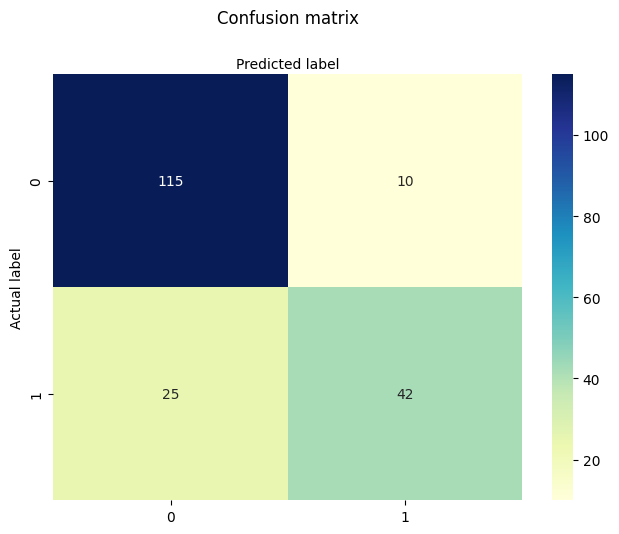

In [12]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Confusion Matrix Evaluation Metrics

Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [13]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



Well, you got a classification rate of 80%, considered as good accuracy.


### Precision:
Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 83% of the time.

### Recall:
If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 57% of the time.

## ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate.

It shows the tradeoff between sensitivity and specificity.

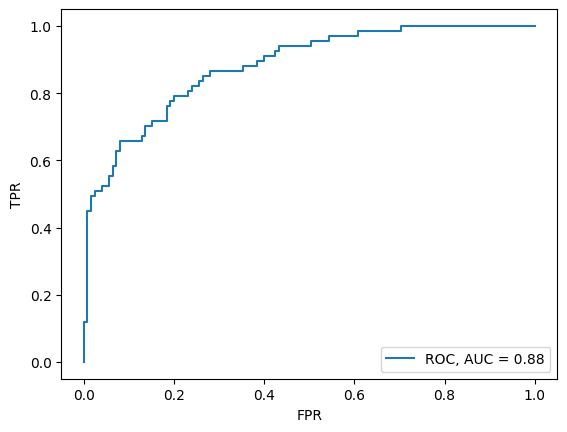

In [21]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="ROC, AUC = " + str(round(auc,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

# Save Results for Later Use

In [66]:
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
without diabetes,0.821429,0.920000,0.867925,125.000000
with diabetes,0.807692,0.626866,0.705882,67.000000
accuracy,0.817708,0.817708,0.817708,0.817708
macro avg,0.814560,0.773433,0.786903,192.000000
weighted avg,0.816635,0.817708,0.811379,192.000000


In [67]:
# Save to file
df.to_csv('Results.csv')